In [694]:
import pandas as pd
import numpy as np
import re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [705]:
t1 = pd.read_csv("nacimiento_edad_semana.csv", sep=";", encoding="latin1") #OK1
t2 = pd.read_csv("partos_nacimientos.csv", sep=";", encoding="latin1") 
t3 = pd.read_csv("porcentaje_nacidos_nacionalidad.csv", sep=";", encoding="latin1") #OK2
df_fecundidad = pd.read_csv("tasa_fecundidad_nacionalidad.csv", sep=";") #me gusta mucho las columnas
t5 = pd.read_csv("aborto_metodo.csv", sep=";")#OK3
t6 = pd.read_csv("aborto_edad.csv", sep=";")#OK3
t7 = pd.read_csv("aborto_motivo.csv", sep=";")#OK3
t8 = pd.read_csv("aborto_gestacion.csv", sep=";")#OK3
t9 = pd.read_csv("conyuntural_fecundidad.csv", sep=";", encoding="latin1") #OK2
t10 = pd.read_csv("nacidos_semana_gestacion.csv", sep=";", encoding="latin1") #OK1
t11 = pd.read_csv("hombres_embarazo.csv", sep=";", encoding="latin1")
df_ive_cat = pd.read_csv("ive_catalunya.csv", sep=";")
df_mujeres = pd.read_csv("mujeres_intencion_3años.csv", sep=";")


Antes de juntar las tablas he mirado que todas las columnas coincidan y que si se tiene que modificar el nombre de las columnas o agrupar se pueda para que no se pierda información.

In [581]:
def convertir_edad_a_grupo(valor):
    # Casos directos
    if valor == "Todas las edades":
        return "Todas las edades"
    if valor == "Menos de 15 años":
        return "Menos de 15 años"
    if valor == "50 y más años":
        return "50 y más años"
    
    # Intentar extraer número de edad
    match = re.search(r'\d+', str(valor))
    if not match:
        return None  # o valor original si prefieres
    
    edad = int(match.group())
    
    if 15 <= edad <= 19:
        return "De 15 a 19 años"
    elif 20 <= edad <= 24:
        return "De 20 a 24 años"
    elif 25 <= edad <= 29:
        return "De 25 a 29 años"
    elif 30 <= edad <= 34:
        return "De 30 a 34 años"
    elif 35 <= edad <= 39:
        return "De 35 a 39 años"
    elif 40 <= edad <= 44:
        return "De 40 a 44 años"
    elif 45 <= edad <= 49:
        return "De 45 a 49 años"
    elif edad >= 50:
        return "50 y más años"
    elif edad < 15:
        return "Menos de 15 años"
    
    return None

t1["Edad de la madre"] = t1["Edad de la madre"].apply(convertir_edad_a_grupo)
t10["Edad de la madre"] = t10["Edad de la madre"].apply(convertir_edad_a_grupo)

t1 = t1.rename(columns={"Edad de la madre": "Grupo de edad de la madre"})
t10 = t10.rename(columns={"Edad de la madre": "Grupo de edad de la madre"})


In [582]:
t10 = t10.rename(columns={"Nacional y provincias": "Provincias"})

#### Limpieza de t5,t6,t7,t8 antes de juntar

In [583]:
def limpiar_concepto_abortos(df):
    reemplazos = {
        'Abortos voluntarios de mujeres residentes entre ': '',
        'Abortos voluntarios de mujeres residentes de ': '',
        'Abortos voluntarios de mujeres residentes ': ''
    }
    
    for buscar, nuevo in reemplazos.items():
        df["Concepto"] = df["Concepto"].str.replace(buscar, nuevo, regex=False)
    
    df["Concepto"] = df["Concepto"].str.strip()
    return df

In [584]:
def limpiar_columnas(df):
    columnas_a_eliminar = [
        "Tipo territorio",
        "Código territorio",
        "Territorio",
        "Unidad",
        "Estado dato"
    ]
    
    df = df.drop(columns=columnas_a_eliminar, errors="ignore")
    return df

In [585]:
def quitar_acentos(texto):
    if isinstance(texto, str):
        return ''.join(c for c in unicodedata.normalize('NFKD', texto) if not unicodedata.combining(c))
    return texto

In [586]:
def renombrar_columna(df, vieja, nueva):
    df = df.rename(columns={vieja: nueva})
    return df

Limpieza del t5

In [587]:
t5.head(3)

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,3728,Número,NaN
1,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,424,Número,NaN
2,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,16231,Número,NaN


In [588]:
t5 = renombrar_columna(t5, "Año", "Anyo")
t5.head()

,Anyo,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,3728,Número,NaN
1,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,424,Número,NaN
2,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,16231,Número,NaN
3,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,304,Número,NaN
4,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,76,Número,NaN


In [589]:
t5 = limpiar_columnas(t5)
t5.head()

,Anyo,Concepto,Valor
0,2011,Abortos voluntarios de mujeres residentes real...,3728
1,2011,Abortos voluntarios de mujeres residentes real...,424
2,2011,Abortos voluntarios de mujeres residentes real...,16231
3,2011,Abortos voluntarios de mujeres residentes real...,304
4,2011,Abortos voluntarios de mujeres residentes real...,76


In [590]:
t5 = limpiar_concepto_abortos(t5)
t5.tail()

,Anyo,Concepto,Valor
65,2024,realizados por el método de prostaglandinas,357
66,2024,realizados por el método de mifepristona,790
67,2024,realizados por el método de dilatación y evacu...,4480
68,2024,realizados por el método de dilatación y aspir...,12605
69,2024,realizados por otros métodos / no consta,10


In [591]:
t5["Concepto"] = (t5['Concepto']
.str.replace('Abortos voluntarios de mujeres residentes realizados por el metodo de ', '', regex=False)
#.str.replace('Abortos voluntarios de mujeres residentes realizados por ', '', regex=False)
.str.replace(' / ', ' ', regex=False)
.str.strip()
)
t5.head()

,Anyo,Concepto,Valor
0,2011,realizados por el método de dilatación y evacu...,3728
1,2011,realizados por el método de mifepristona,424
2,2011,realizados por el método de dilatación y aspir...,16231
3,2011,realizados por el método de prostaglandinas,304
4,2011,realizados por otros métodos no consta,76


In [592]:
t5['Concepto'] = t5['Concepto'].apply(quitar_acentos)
t5.head()

,Anyo,Concepto,Valor
0,2011,realizados por el metodo de dilatacion y evacu...,3728
1,2011,realizados por el metodo de mifepristona,424
2,2011,realizados por el metodo de dilatacion y aspir...,16231
3,2011,realizados por el metodo de prostaglandinas,304
4,2011,realizados por otros metodos no consta,76


Limpieza del dataset t6

In [593]:
t6.head(3)

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,-,Número,NaN
1,1986,Abortos voluntarios de mujeres residentes de 4...,Otros,NaN,NaN,-,Número,NaN
2,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,-,Número,NaN


In [594]:
t6 = renombrar_columna(t6, "Año", "Anyo")
t6 = limpiar_concepto_abortos(t6)
t6['Concepto'] = t6['Concepto'].apply(quitar_acentos)
t6 = limpiar_concepto_abortos(t6)
t6 = limpiar_columnas(t6)
t6.tail()

,Anyo,Concepto,Valor
346,2024,Total abortos voluntarios de mujeres residentes,18149
347,2024,15 y 19 anos,1759
348,2024,30 y 34 anos,3575
349,2024,44 anos y mas,125
350,2024,40 y 44 anos,1294


Limpieza dataset t7

In [595]:
t7.head(3)

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,1,Número,NaN
1,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,-,Número,NaN
2,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,-,Número,NaN


In [596]:
t7 = renombrar_columna(t7, "Año", "Anyo")
t7 = limpiar_columnas(t7)
t7 = limpiar_concepto_abortos(t7)
t7['Concepto'] = t7['Concepto'].apply(quitar_acentos)
t7.head()


,Anyo,Concepto,Valor
0,1986,por violacion,1
1,1986,por riesgo de graves anomalias del feto,-
2,1986,por grave riesgo para la vida o salud de la em...,-
3,1986,por salud materna,137
4,1986,anomalias fetales incompatibles con la vida o ...,-


Limpieza dataset t8

In [597]:
t8.head(3)

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,-,Número,NaN
1,1986,Abortos voluntarios de mujeres residentes de l...,Otros,NaN,NaN,6,Número,NaN
2,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,1,Número,NaN


In [598]:
t8 = renombrar_columna(t8, "Año", "Anyo")
t8 = limpiar_columnas(t8)
t8 = limpiar_concepto_abortos(t8)
t8['Concepto'] = t8['Concepto'].apply(quitar_acentos)
t8.head(3)

,Anyo,Concepto,Valor
0,1986,13 y 16 semanas de gestacion,-
1,1986,los que no consta las semanas de gestacion,6
2,1986,21 semanas y mas de gestacion,1


juntar los datasets, crear una columna para saber que dato es de que datasets y pivotear

In [599]:
t5["origen"] = "metodo"
t6["origen"] = "edad"
t7["origen"] = "motivo"
t8["origen"] = "gestacion"

## Agrupamos por categoria 
1. Nacionalidad
2. Fecundidad
3. Aborto
4. Catalunya IVE

In [600]:
df_nacimientos = pd.concat([t1, t10], ignore_index=True)
df_nacimientos_nacionalidad = pd.concat([t3, t9], ignore_index=True)
df_abortos = pd.concat([t5, t6, t7, t8], ignore_index=True)
df_ive_cat
df_mujeres
df_fecundidad


,Comunidades y Ciudades Autónomas,Nacionalidad,Edad,Periodo,Total
0,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2024,"0,07"
1,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2023,"0,06"
2,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2022,"0,06"
3,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2021,"0,05"
4,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2020,"0,05"
...,...,...,...,...,...
26995,19 Melilla,Extranjera,50 y más años,1979,NaN
26996,19 Melilla,Extranjera,50 y más años,1978,NaN
26997,19 Melilla,Extranjera,50 y más años,1977,NaN
26998,19 Melilla,Extranjera,50 y más años,1976,NaN


LImpieza de df_nacimientos
. renombrar el nombre de las columnas
. eliminar valores nulos en caso de haber 


In [601]:
df_nacimientos.rename(columns={"Grupo de edad de la madre": "Grupo_edad_madre",'Semanas de gestaciÃ³n': 'Semanas_gestacion'}, inplace=True)

LImpieza de df_nacimientos_nacionalidad

In [602]:
df_nacimientos_nacionalidad["Total"].unique()

array(['52,70', '52,42', '52,56', '36,64', '36,78', '36,22', '7,94',
       '8,07', '8,48', '2,72', '2,74', '44,92', '43,71', '43,74', '33,43',
       '33,84', '32,81', '13,92', '14,69', '15,34', '7,73', '7,77',
       '8,12', '1,1', '1,12', '1,16', '1,18', '1,23', '1,26', '1,31',
       '1,33', '1,32', '1,27', '1,34', '1,37', '1,38', '1,44', '1,36',
       '1,3', '1,25', '1,24', '1,21', '1,13', '1,15', '1,14', '1,19',
       '1,4', '1,45', '1,49', '1,55', '1,64', '1,72', '1,8', '1,94',
       '2,04', '2,21', '2,37', '2,54', '2,65', '2,77', '0,57', '0,6',
       '0,62', '0,63', '0,64', '0,68', '0,7', '0,71', '0,73', '0,74',
       '0,76', '0,79', '0,81', '0,72', '0,66', '0,61', '0,58', '0,56',
       '0,67', '0,69', '0,75', '0,8', '0,83', '0,9', '0,91', '0,94',
       '0,98', '1,02', '1', '0,39', '0,4', '0,42', '0,41', '0,44', '0,46',
       '0,48', '0,49', '0,47', '0,45', '0,51', '0,43', '0,5', '0,55',
       '0,53', '0,65', '0,82', '0,84', '0,1', '0,11', '0,12', '0,13',
       '0,14'

In [603]:
df_nacimientos_nacionalidad.rename(columns={"Orden de nacimiento": "Orden_nacimiento"}, inplace=True)
df_nacimientos_nacionalidad['Nacionalidad'] = df_nacimientos_nacionalidad['Nacionalidad'].replace('EspaÃ±ola', 'Espanola')
df_nacimientos_nacionalidad['Orden_nacimiento'] = df_nacimientos_nacionalidad['Orden_nacimiento'].replace('Cuarto y mÃ¡s', 'Cuarto y mas')


In [604]:
df_abortos.head()

,Anyo,Concepto,Valor,origen
0,2011,realizados por el metodo de dilatacion y evacu...,3728,metodo
1,2011,realizados por el metodo de mifepristona,424,metodo
2,2011,realizados por el metodo de dilatacion y aspir...,16231,metodo
3,2011,realizados por el metodo de prostaglandinas,304,metodo
4,2011,realizados por otros metodos no consta,76,metodo


LImpieza dataset df_nacimientos_nacionalidad

In [605]:
df_nacimientos_nacionalidad  = df_nacimientos_nacionalidad.drop(columns=["Totales Territoriales"])

In [606]:
df_nacimientos_nacionalidad["Nacionalidad"] = (df_nacimientos_nacionalidad['Nacionalidad']
.str.replace('EspaÃ±ola', 'Espanola', regex=False)
.str.replace(' / ', ' ', regex=False)
.str.strip()
)

Limpieza dataset df_mujeres

In [607]:
df_fecundidad["Total_numerico"] = (
    df_fecundidad["Total"]
    .astype(str)
    .str.strip()
    .str.replace(",", ".", regex=False)
    .astype(float)
)
df_fecundidad["Total"].dtype

dtype('O')

Cree tablas temporales 

In [608]:
df_temp_ambas = df_fecundidad[
    (df_fecundidad["Nacionalidad"] == "Ambas nacionalidades") &
    (df_fecundidad["Comunidades y Ciudades Autónomas"] != "Total Nacional")
].copy()

df_temp_ambas["Comunidades y Ciudades Autónomas"].unique()

array(['01 Andalucía', '02 Aragón', '03 Asturias, Principado de',
       '04 Balears, Illes', '05 Canarias', '06 Cantabria',
       '07 Castilla y León', '08 Castilla - La Mancha', '09 Cataluña',
       '10 Comunitat Valenciana', '11 Extremadura', '12 Galicia',
       '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La',
       '18 Ceuta', '19 Melilla'], dtype=object)

In [609]:
#tabla donde la nacionalidad sea diferente a Ambas Nacionalidades
df_temp_extr_esp = df_fecundidad[
    (df_fecundidad["Nacionalidad"].isin(["Extranjera", "Española"])) &
    (df_fecundidad["Comunidades y Ciudades Autónomas"] != "Total Nacional")
].copy()

df_temp_extr_esp.head()

,Comunidades y Ciudades Autónomas,Nacionalidad,Edad,Periodo,Total,Total_numerico
1800,01 Andalucía,Española,De 10 a 14 años,2024,"0,06",0.06
1801,01 Andalucía,Española,De 10 a 14 años,2023,"0,06",0.06
1802,01 Andalucía,Española,De 10 a 14 años,2022,"0,07",0.07
1803,01 Andalucía,Española,De 10 a 14 años,2021,"0,08",0.08
1804,01 Andalucía,Española,De 10 a 14 años,2020,"0,05",0.05


Convertir de tipo objeto a int

In [610]:
"""df_abortos['Valor'] = pd.to_numeric(df_abortos['Valor'], errors='coerce')
df_abortos['Valor']= df_abortos['Valor'].fillna(0)
df_abortos['Valor']= df_abortos['Valor'].astype(int) """

"df_abortos['Valor'] = pd.to_numeric(df_abortos['Valor'], errors='coerce')\ndf_abortos['Valor']= df_abortos['Valor'].fillna(0)\ndf_abortos['Valor']= df_abortos['Valor'].astype(int) "

In [611]:
df_abortos["Valor"] = df_abortos["Valor"].replace(["-", " ", "", "s/d", "na"], None)
df_abortos["Valor"] = pd.to_numeric(df_abortos["Valor"])
df_abortos.loc[~df_abortos["Valor"].apply(lambda x: isinstance(x, (int, float))), "Valor"].unique()

array([], dtype=float64)

#### Empezamos...

In [612]:
df_abortos.head()

,Anyo,Concepto,Valor,origen
0,2011,realizados por el metodo de dilatacion y evacu...,3728.0,metodo
1,2011,realizados por el metodo de mifepristona,424.0,metodo
2,2011,realizados por el metodo de dilatacion y aspir...,16231.0,metodo
3,2011,realizados por el metodo de prostaglandinas,304.0,metodo
4,2011,realizados por otros metodos no consta,76.0,metodo


1. ANALISIS: df_abortos

## 1. ¿Qué métodos de aborto son los más utilizados cada año?


In [613]:
df_met = df_abortos[df_abortos["origen"] == "metodo"]

df_line = df_met.groupby(["Anyo", "Concepto"])["Valor"].sum().reset_index()

fig = px.line(
    df_line,
    x="Anyo",
    y="Valor",
    color="Concepto",
    markers=True,
    hover_data=["Anyo", "Concepto", "Valor"],
    title="Métodos de aborto por año (interactivo, origen = método)"
)

fig.update_layout(
    hovermode="x unified",
    width=1000,
    height=600
)

fig.show()

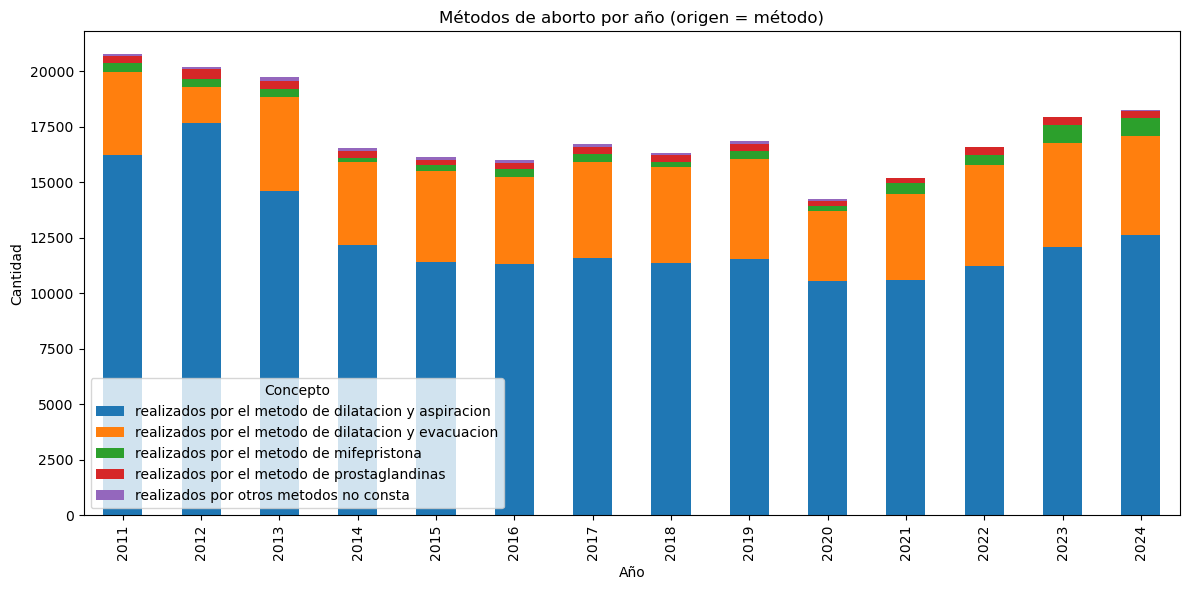

In [614]:
df_met = df_abortos[df_abortos["origen"] == "metodo"]

pivot1 = df_met.groupby(["Anyo", "Concepto"])["Valor"].sum().unstack()

pivot1.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Métodos de aborto por año (origen = método)")
plt.ylabel("Cantidad")
plt.xlabel("Año")
plt.tight_layout()
plt.show()


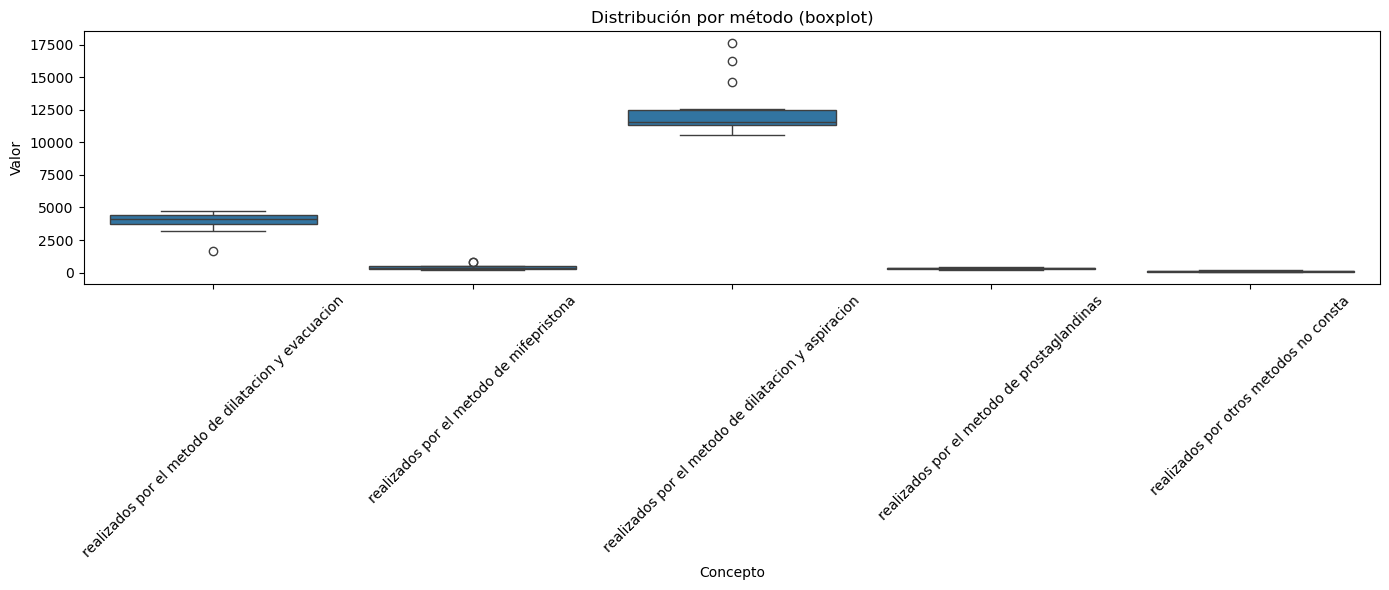

In [615]:

plt.figure(figsize=(14,6))
sns.boxplot(data=df_met, x="Concepto", y="Valor")
plt.title("Distribución por método (boxplot)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. ¿Cómo evoluciona el total de abortos por año? 

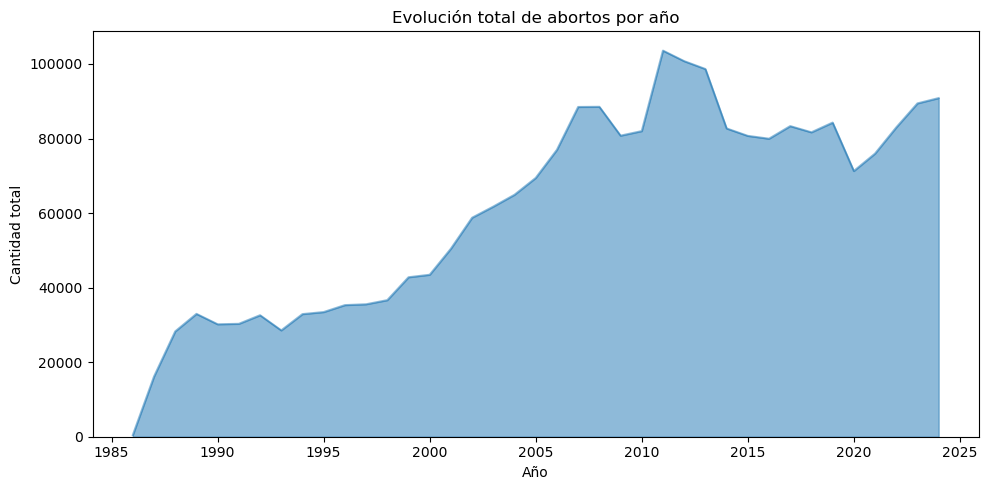

In [616]:
df_abortos.groupby("Anyo")["Valor"].sum().plot(
    kind="area",
    alpha=0.5,
    figsize=(10,5)
)

plt.title("Evolución total de abortos por año")
plt.ylabel("Cantidad total")
plt.xlabel("Año")
plt.tight_layout()
plt.show()



### 3. ¿Qué porcentaje representa cada concepto dentro del total?

In [617]:
df_abortos_pct = ( df_abortos.groupby("Concepto")["Valor"].sum() / df_abortos["Valor"].sum() * 100 )
df_abortos_pct.sort_values(ascending=False)

Concepto
Total abortos voluntarios de mujeres residentes                                              22.528247
8 o menos semanas de gestacion                                                               14.498135
por salud materna                                                                            11.768666
a peticion de la mujer                                                                        9.206874
realizados por el metodo de dilatacion y aspiracion                                           7.328361
25 y 29 anos                                                                                  5.349987
20 y 24anos                                                                                   5.334447
30 y 34 anos                                                                                  4.505524
9 y 12 semanas de gestacion                                                                   3.953188
35 y 39 anos                                                    

#### 4.¿Qué conceptos han crecido o disminuido más? 

In [618]:
df_metodos = df_abortos[df_abortos["Concepto"] != "Total abortos voluntarios de mujeres residentes"]

df_pct = (
    df_metodos.groupby("Concepto")["Valor"].sum().reset_index()
)
df_pct["Porcentaje"] = df_pct["Valor"] / df_pct["Valor"].sum() * 100

fig = px.treemap(
    df_pct,
    path=["Concepto"],
    values="Porcentaje",
    title="Porcentaje por método"
)
fig.show()


## PREGUNTAR sobre la imagen de escaleras 

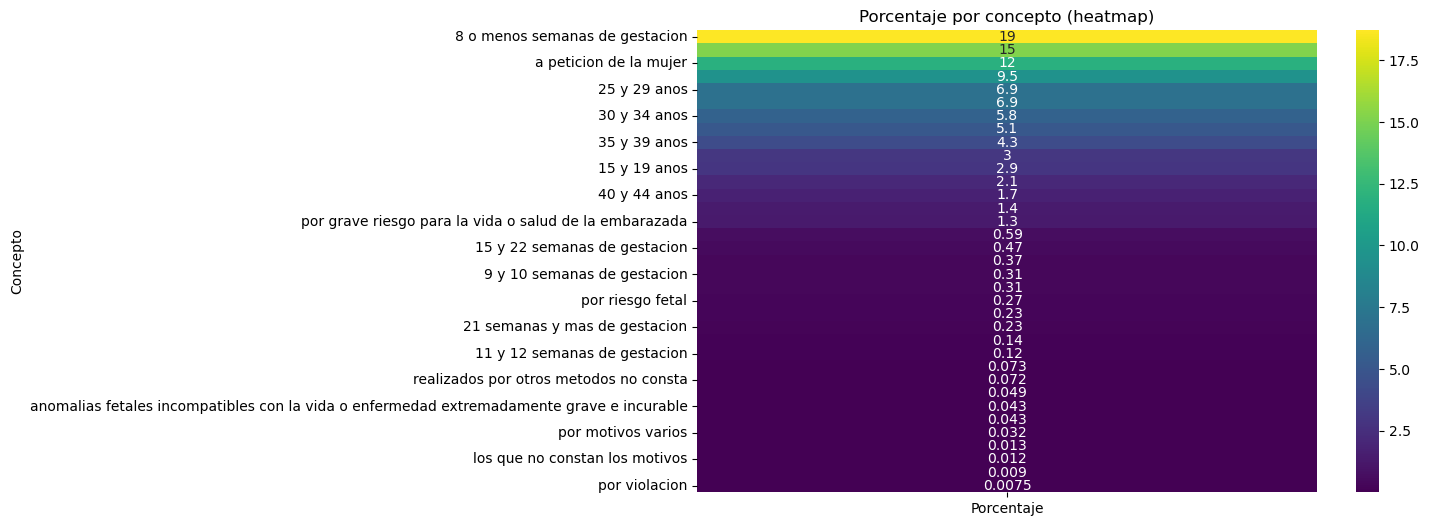

In [619]:
df_pct_sorted = df_pct.sort_values("Porcentaje", ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(
    df_pct_sorted.set_index("Concepto")[["Porcentaje"]],
    annot=True,
    cmap="viridis"
)
plt.title("Porcentaje por concepto (heatmap)")
plt.show()


### 5.  ¿Qué conceptos han crecido o disminuido más?

In [620]:
df_crecimiento = df_abortos.pivot_table(values="Valor", index="Concepto", columns="Anyo")

df_crecimiento = df_crecimiento.dropna()

df_crecimiento["crecimiento_%"] = (
    (df_crecimiento.iloc[:,-1] - df_crecimiento.iloc[:,0]) / df_crecimiento.iloc[:,0]
) * 100

df_crecimiento_sorted = df_crecimiento.sort_values("crecimiento_%", ascending=False)
df_crecimiento_sorted

Anyo,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,crecimiento_%
Concepto,,,,,,,,,,,,,,,,,,,,,
8 o menos semanas de gestacion,57.0,2792.0,3463.0,5322.0,4903.0,4946.0,5358.0,4694.0,5150.0,5291.0,...,11206.0,11953.0,11666.0,11947.0,10196.0,10728.0,11825.0,12884.0,13441.0,23480.701754
Total abortos voluntarios de mujeres residentes,148.0,5379.0,7063.0,8238.0,7541.0,7571.0,8147.0,7131.0,8223.0,8360.0,...,15987.0,16652.0,16330.0,16852.0,14254.0,15188.0,16592.0,17870.0,18149.0,12162.837838
los que no consta las semanas de gestacion,6.0,61.0,55.0,27.0,4.0,5.0,7.0,23.0,185.0,138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.000000
los que no constan los motivos,1.0,14.0,8.0,4.0,8.0,2.0,0.0,5.0,21.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.000000
por motivos varios,1.0,22.0,43.0,36.0,11.0,23.0,0.0,0.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.000000


In [621]:
df_crecimiento_sorted[df_crecimiento_sorted["crecimiento_%"].isna()]


Anyo,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,crecimiento_%
Concepto,,,,,,,,,,,,,,,,,,,,,


 ## *como arreglo el error de los nombres*

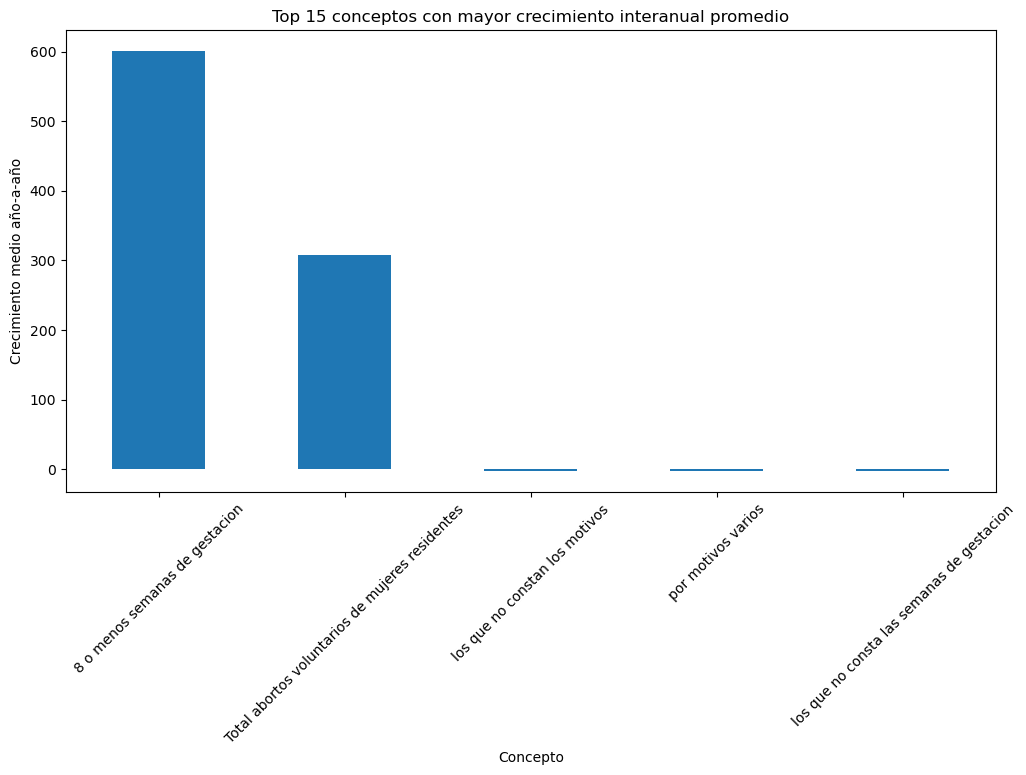

In [622]:
df_diferencia = df_crecimiento_sorted.diff(axis=1)

df_diferencia_mean = df_diferencia.mean(axis=1).sort_values(ascending=False)

df_diferencia_mean.head(15).plot(
    kind="bar",
    figsize=(12,6),
    title="Top 15 conceptos con mayor crecimiento interanual promedio",
    rot=45
)
plt.ylabel("Crecimiento medio año-a-año")
plt.show()


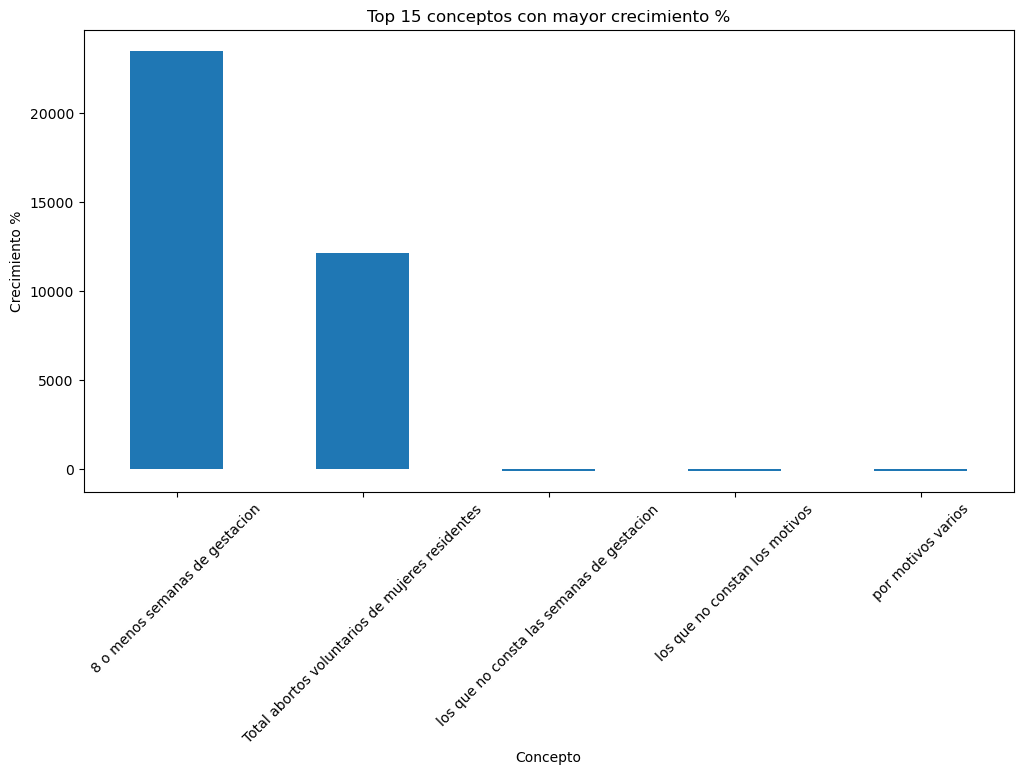

In [623]:
df_crecimiento_sorted["crecimiento_%"].head(25).plot(
    kind="bar",
    figsize=(12,6),
    title="Top 15 conceptos con mayor crecimiento %",
    rot=45
)
plt.ylabel("Crecimiento %")
plt.show()


# Analisis del datasets: df_ive_cat
## ❓ Pregunta 2: ¿Qué edades concentran mayor número de IVE?


In [ ]:
# Sumar por grupo de edad
age_counts = df_ive_cat.groupby("grup d'edat", dropna=False)['nombre de casos'].sum().sort_values(ascending=False)
#print(age_counts)

# Porcentaje (El % (age_pct) muestra la concentración relativa (%) para evaluar si la mayor parte se concentra en unas pocas categorías de edad.)
age_pct = (age_counts / age_counts.sum() * 100).round(2)
print(pd.concat([age_counts, age_pct.rename('porcentajes')], axis=1))


               nombre de casos  porcentajes
grup d'edat                                
25 a 29 anys             78551        22.39
20 a 24 anys             75594        21.55
30 a 34 anys             74295        21.18
35 a 39 anys             58241        16.60
0 a 19 anys              38588        11.00
40 a 44 anys             23539         6.71
45 anys o més             1958         0.56


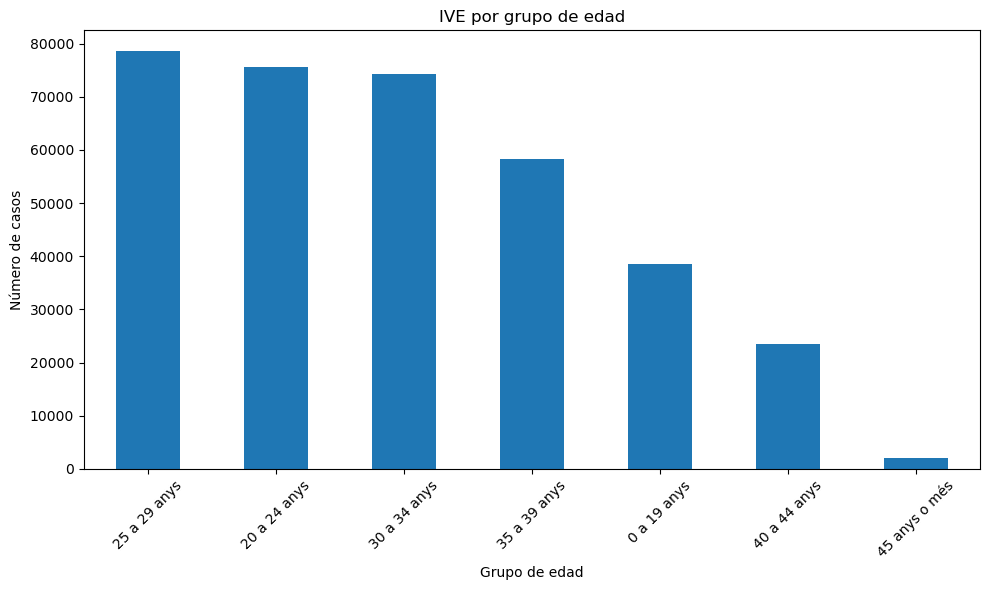

In [ ]:
age_counts = df_ive_cat.groupby("grup d'edat")['nombre de casos'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
age_counts.plot(kind='bar')
plt.title("Grupo de edad en Cataluña")
plt.ylabel("Número de casos")
plt.xlabel("Grupo de edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


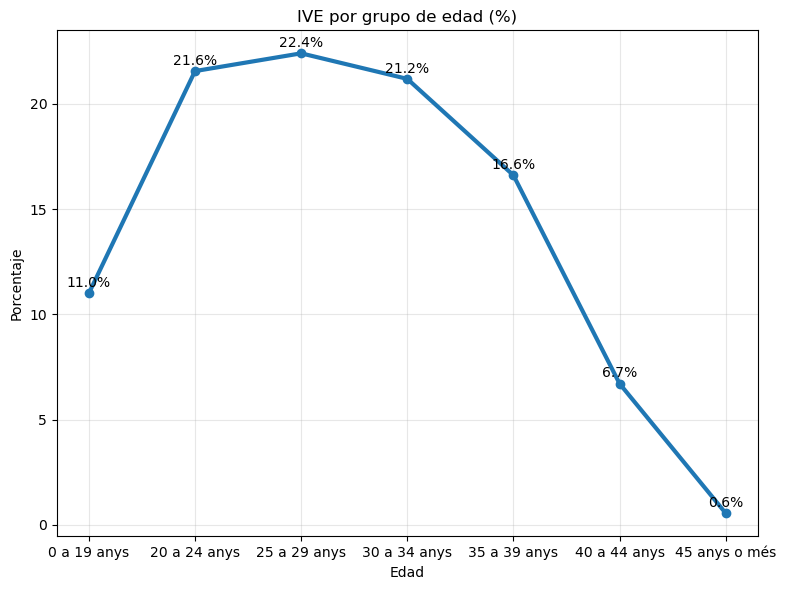

In [695]:
edad_counts = df_ive_cat.groupby("grup d'edat")['nombre de casos'].sum()
edad_pct = edad_counts / edad_counts.sum() * 100

plt.figure(figsize=(8,6))
plt.plot(edad_pct.index, edad_pct.values, marker='o', linewidth=3)

for x, y in zip(edad_pct.index, edad_pct.values):
    plt.text(x, y + 0.3, f"{y:.1f}%", ha='center')

plt.title("IVE por grupo de edad (%)")
plt.ylabel("Porcentaje")
plt.xlabel("Edad")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Pregunta 3: ¿Cómo influye la situación laboral en las IVE?

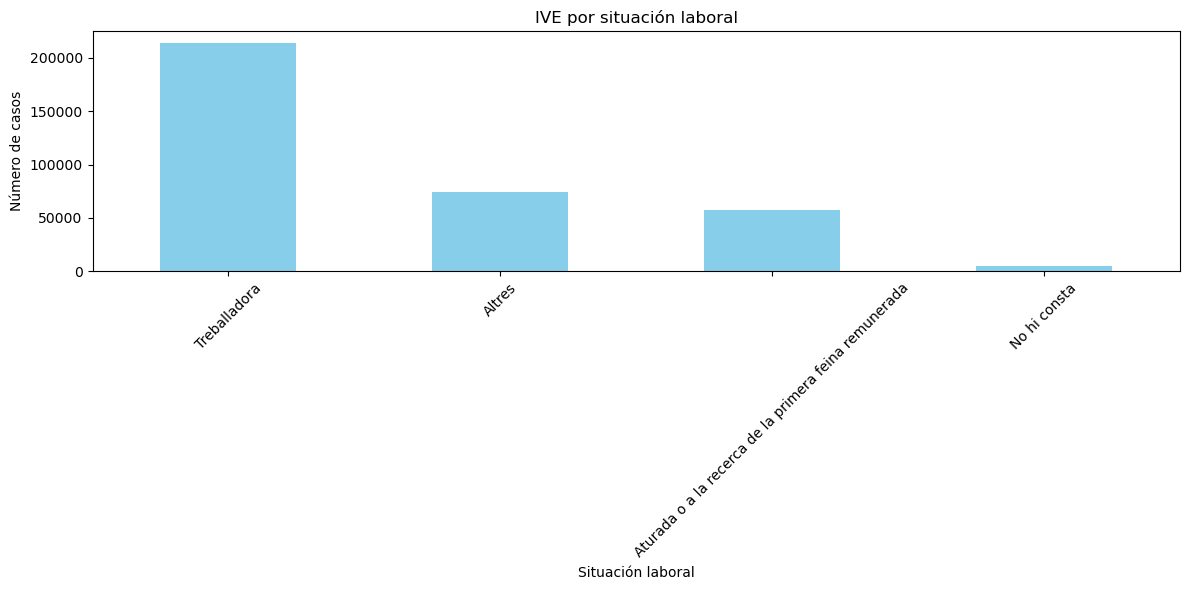

In [ ]:
labor_counts = df_ive_cat.groupby("situació laboral")['nombre de casos'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
labor_counts.plot(kind='bar', color='skyblue')
plt.title("IVE por situación laboral")
plt.xlabel("Situación laboral")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

çax2 = fig.add_subplot(2, 2, 2)
labor_counts.sort_values().plot(kind='barh', ax=ax2, color='steelblue')
ax2.set_title("IVE por situación laboral", fontsize=14)
ax2.set_xlabel("Número de casos")

In [646]:
# Total por situación laboral
labor_counts = df_ive_cat.groupby('situació laboral', dropna=False)['nombre de casos'].sum().sort_values(ascending=False)
print(labor_counts)

# Normalizar por total para ver proporciones
labor_pct = (labor_counts / labor_counts.sum() * 100).round(2)
print(pd.concat([labor_counts, labor_pct.rename('pct')], axis=1))

# Opcional: tabla cruzada situación laboral x grupo de edad
labor_age = df_ive_cat.pivot_table(
    index='situació laboral',
    columns="grup d'edat",
    values='nombre de casos',
    aggfunc='sum',
    fill_value=0
)
print(labor_age)



situació laboral
Treballadora                                             214171
Altres                                                    73962
Aturada o a la recerca de la primera feina remunerada     57319
No hi consta                                               5314
Name: nombre de casos, dtype: int64
                                                    nombre de casos    pct
situació laboral                                                          
Treballadora                                                 214171  61.06
Altres                                                        73962  21.09
Aturada o a la recerca de la primera feina remu...            57319  16.34
No hi consta                                                   5314   1.51
grup d'edat                                         0 a 19 anys  20 a 24 anys  \
situació laboral                                                                
Altres                                                    23458         18784  

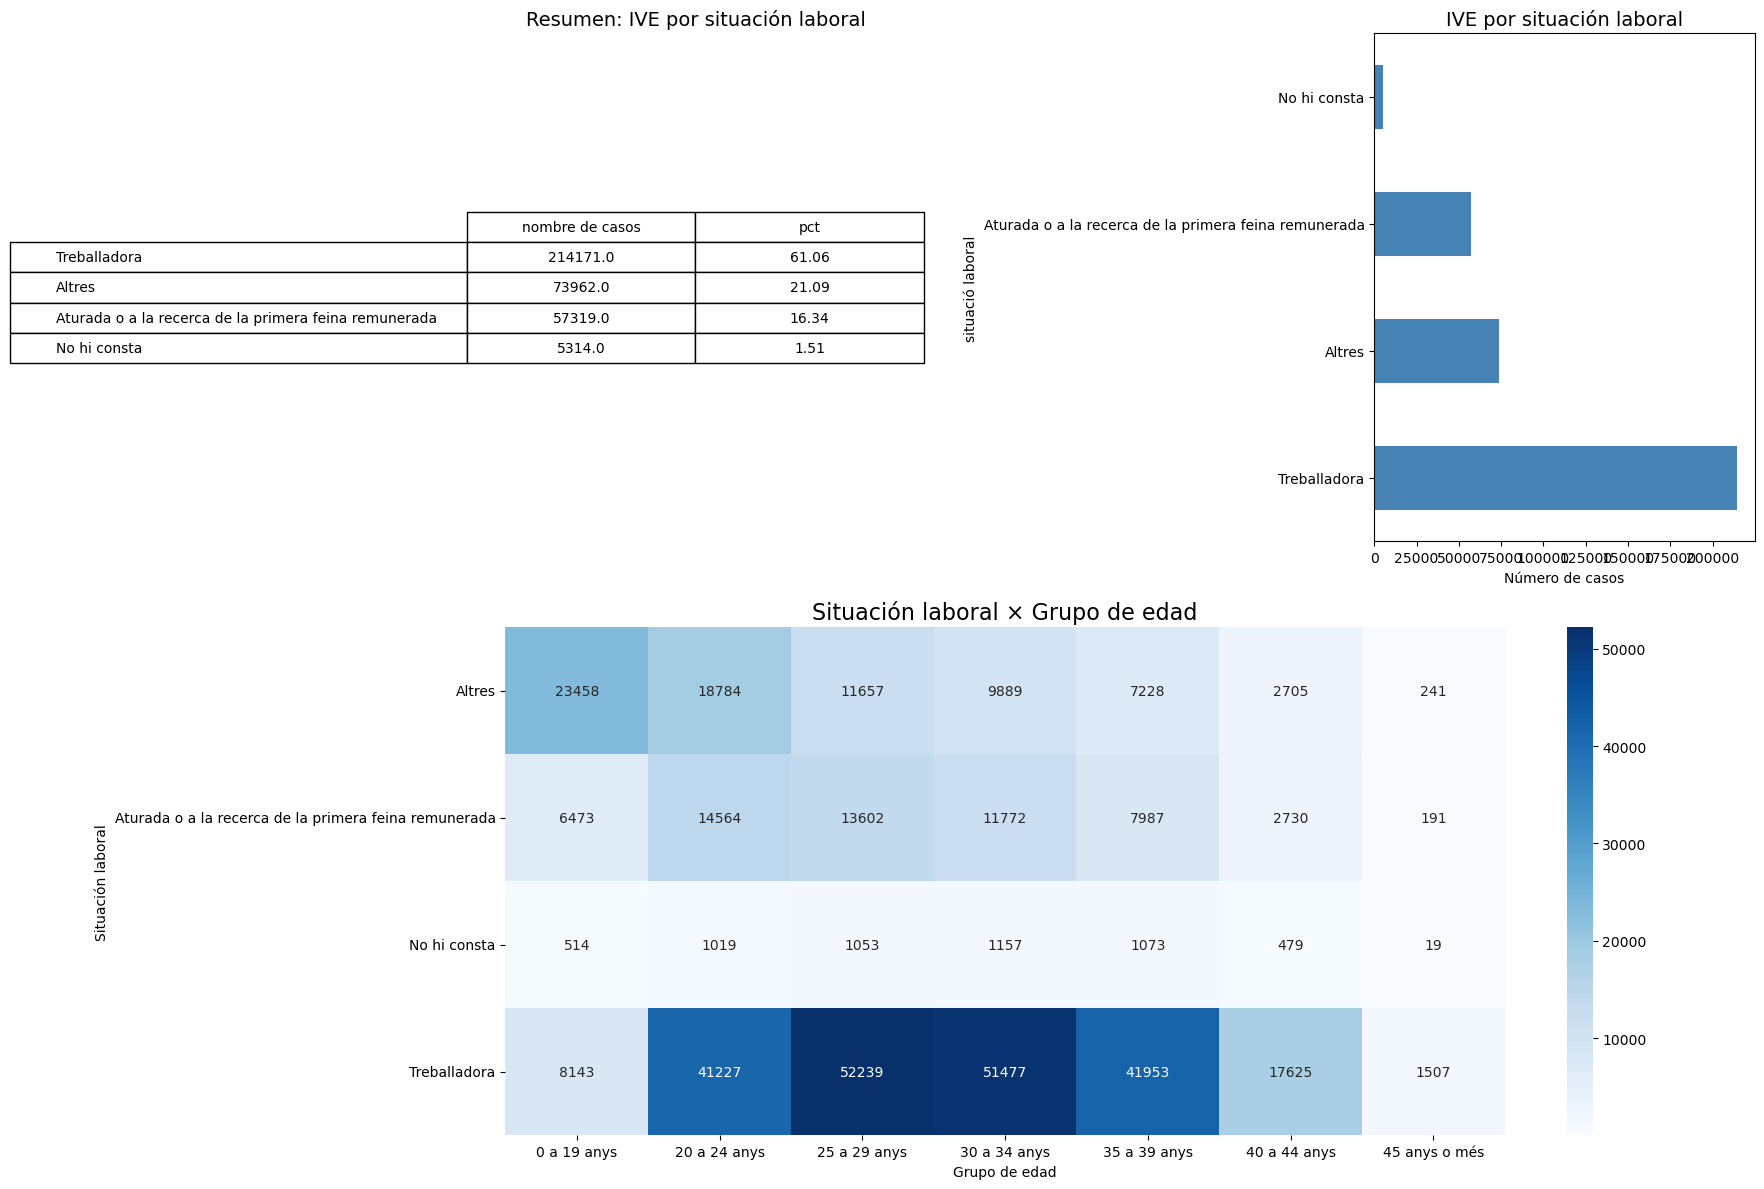

In [ ]:
labor_counts = df_ive_cat.groupby('situació laboral', dropna=False)['nombre de casos'].sum().sort_values(ascending=False)
labor_pct = (labor_counts / labor_counts.sum() * 100).round(2)

tabla_resumen = pd.concat([labor_counts, labor_pct.rename('pct')], axis=1)

labor_age = df_ive_cat.pivot_table(
    index='situació laboral',
    columns="grup d'edat",
    values='nombre de casos',
    aggfunc='sum',
    fill_value=0
)
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 2, 1)
ax1.axis("off")
tabla1 = ax1.table(
    cellText=tabla_resumen.values,
    colLabels=tabla_resumen.columns,
    rowLabels=tabla_resumen.index,
    cellLoc='center',
    loc='center'
)
tabla1.scale(1.2, 1.5)

ax1.set_title("Resumen: IVE por situación laboral", fontsize=14)

ax2 = fig.add_subplot(2, 2, 2)
labor_counts.plot(kind='barh', ax=ax2, color='steelblue')
ax2.set_title("IVE por situación laboral", fontsize=14)
ax2.set_xlabel("Número de casos")

ax3 = fig.add_subplot(2, 1, 2)
sns.heatmap(labor_age, cmap="Blues", annot=True, fmt="d", ax=ax3)
ax3.set_title("Situación laboral × Grupo de edad", fontsize=16)
ax3.set_xlabel("Grupo de edad")
ax3.set_ylabel("Situación laboral")

plt.tight_layout()
plt.show()


## Pregunta 4: ¿Diferencias de IVE por país de residencia? Cuantas son españolas y cuantas son extramjeras y grupo de edad? 


In [654]:
df_ive_cat.columns

Index(['any', 'tipus de centre', 'mètode', 'finançament públic', 'grup d'edat',
       'situació de convivència', 'fills a càrrec', 'fills vius',
       'país de residència', 'codi de la comarca de residència',
       'nom de la comarca de residència', 'país de naixement',
       'primera nacionalitat', 'situació laboral', 'ingressos',
       'nombre de casos'],
      dtype='object')

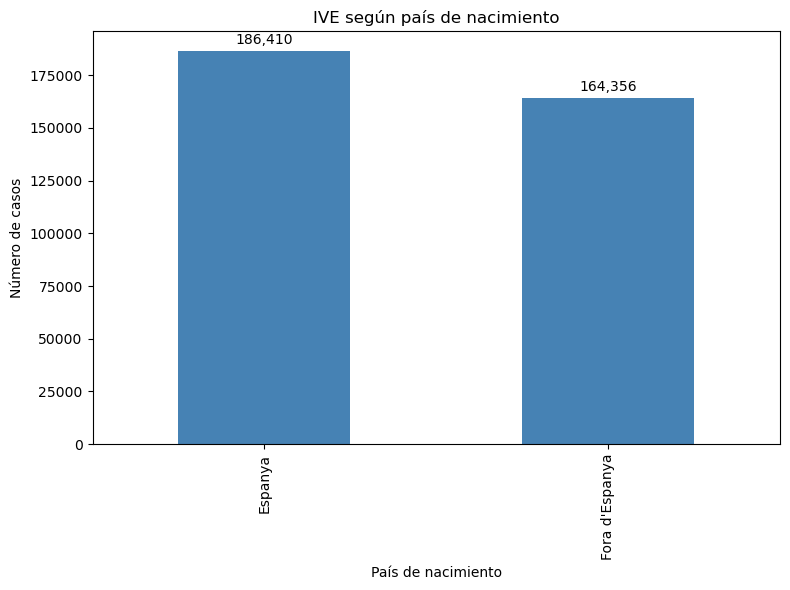

In [671]:
resid_counts = df_ive_cat.groupby("país de naixement")['nombre de casos'].sum()

plt.figure(figsize=(8,6))
ax = resid_counts.plot(kind='bar', color='steelblue')

plt.title("IVE según país de nacimiento")
plt.ylabel("Número de casos")
plt.xlabel("País de nacimiento")

for i, value in enumerate(resid_counts):
    ax.text(i, value + value*0.01,      
            f"{value:,}",               
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

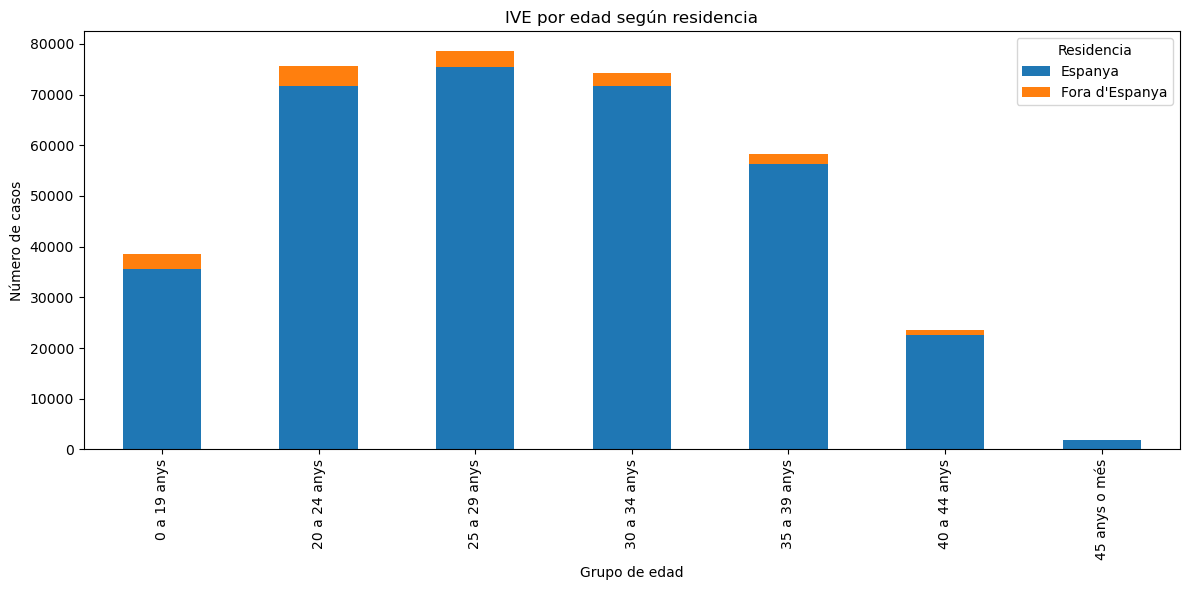

In [667]:
resid_age = df_ive_cat.groupby(['país de residència',"grup d'edat"])['nombre de casos'].sum().unstack(fill_value=0)

plt.figure(figsize=(12,6))
resid_age.T.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("IVE por edad según residencia")
plt.xlabel("Grupo de edad")
plt.ylabel("Número de casos")
plt.legend(title="Residencia")



plt.tight_layout()
plt.show()


## Pregunta 5: ¿Las mujeres con hijos a cargo abortan más que las mujeres sin hijos?

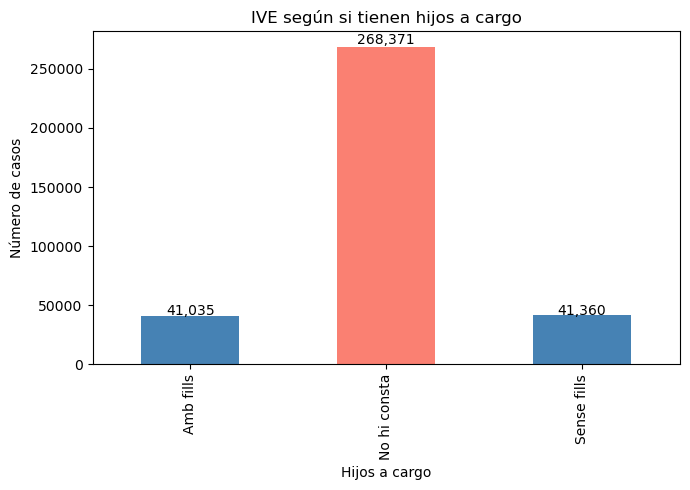

In [672]:
hijos_counts = df_ive_cat.groupby("fills a càrrec")['nombre de casos'].sum()

plt.figure(figsize=(7,5))
ax = hijos_counts.plot(kind='bar', color=['steelblue','salmon'])

plt.title("IVE según si tienen hijos a cargo")
plt.xlabel("Hijos a cargo")
plt.ylabel("Número de casos")

for i, v in enumerate(hijos_counts):
    ax.text(i, v + v*0.01, f"{v:,}", ha='center')

plt.tight_layout()
plt.show()


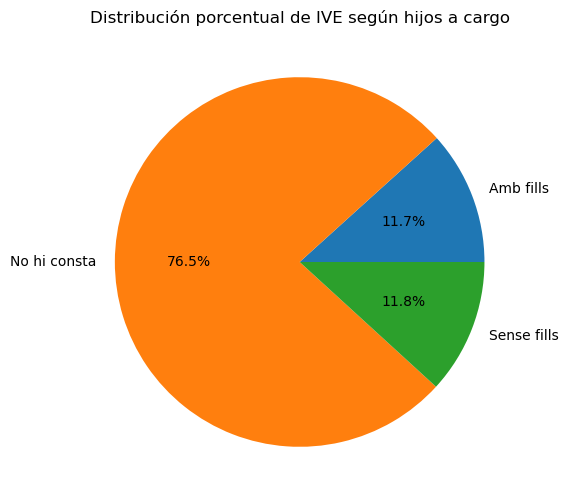

In [674]:
hijos_counts = df_ive_cat.groupby("fills a càrrec")['nombre de casos'].sum()
plt.figure(figsize=(6,6))
plt.pie(hijos_counts, labels=hijos_counts.index, autopct='%1.1f%%')
plt.title("Distribución porcentual de IVE según hijos a cargo")
plt.show()


## Pregunta 6: ¿ Influye tambien en que situacion sentimental se encuentra


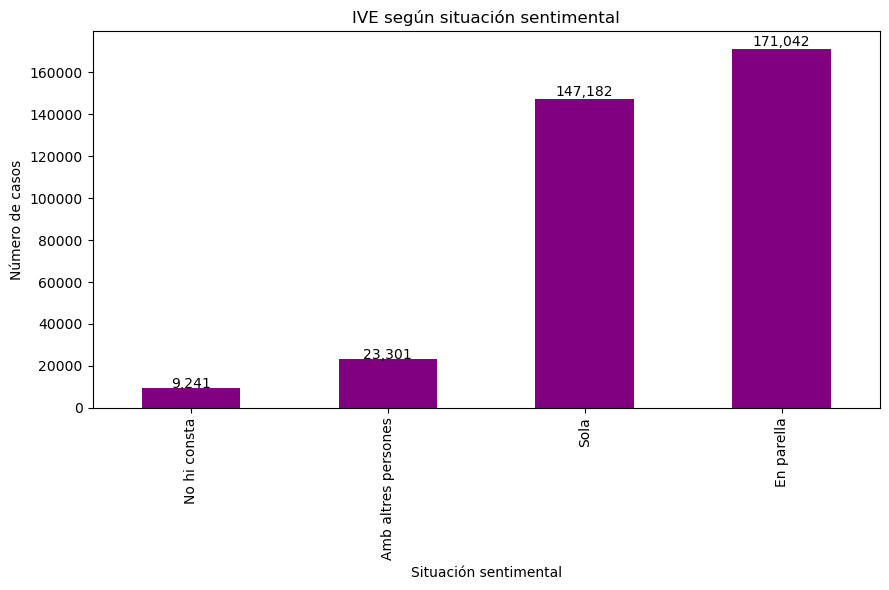

In [676]:
sent_counts = df_ive_cat.groupby("situació de convivència")['nombre de casos'].sum().sort_values()

plt.figure(figsize=(9,6))
ax = sent_counts.plot(kind='bar', color='purple')

plt.title("IVE según situación sentimental")
plt.ylabel("Número de casos")
plt.xlabel("Situación sentimental")

for i, v in enumerate(sent_counts):
    ax.text(i, v + v*0.01, f"{v:,}", ha='center')

plt.tight_layout()
plt.show()


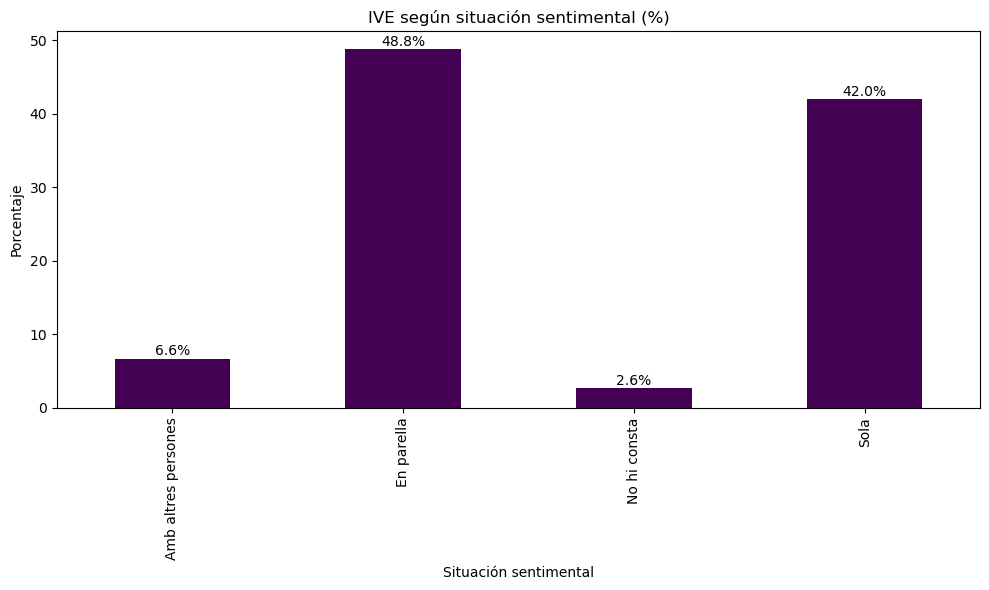

In [686]:
counts = df_ive_cat.groupby("situació de convivència")['nombre de casos'].sum()
pct = counts / counts.sum() * 100

plt.figure(figsize=(10,6))
ax = pct.plot(kind='bar', cmap='viridis')

plt.title("IVE según situación sentimental (%)")
plt.ylabel("Porcentaje")
plt.xlabel("Situación sentimental")

# Mostrar porcentaje encima de cada barra
for i, v in enumerate(pct):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


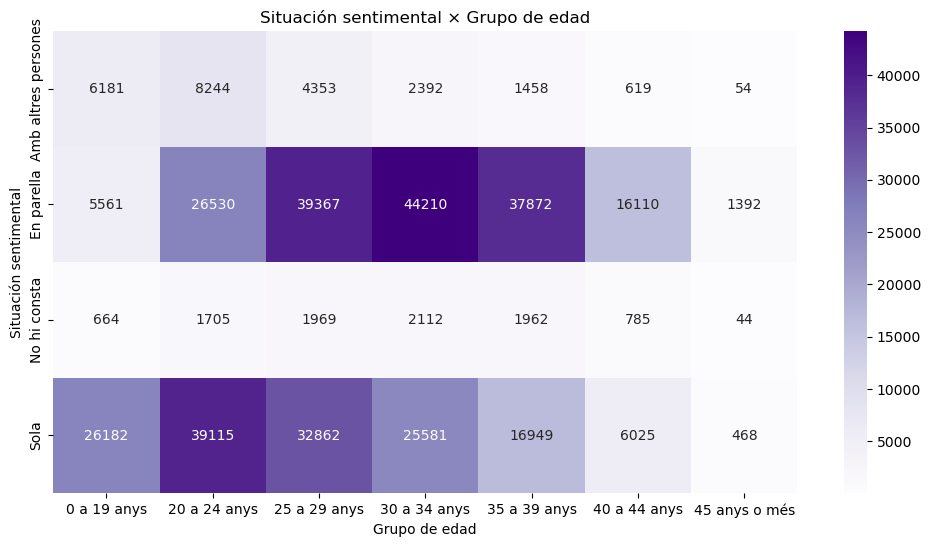

In [678]:
sent_age = df_ive_cat.pivot_table(
    index="situació de convivència",
    columns="grup d'edat",
    values="nombre de casos",
    aggfunc="sum",
    fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(sent_age, annot=True, fmt="d", cmap="Purples")
plt.title("Situación sentimental × Grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Situación sentimental")
plt.show()


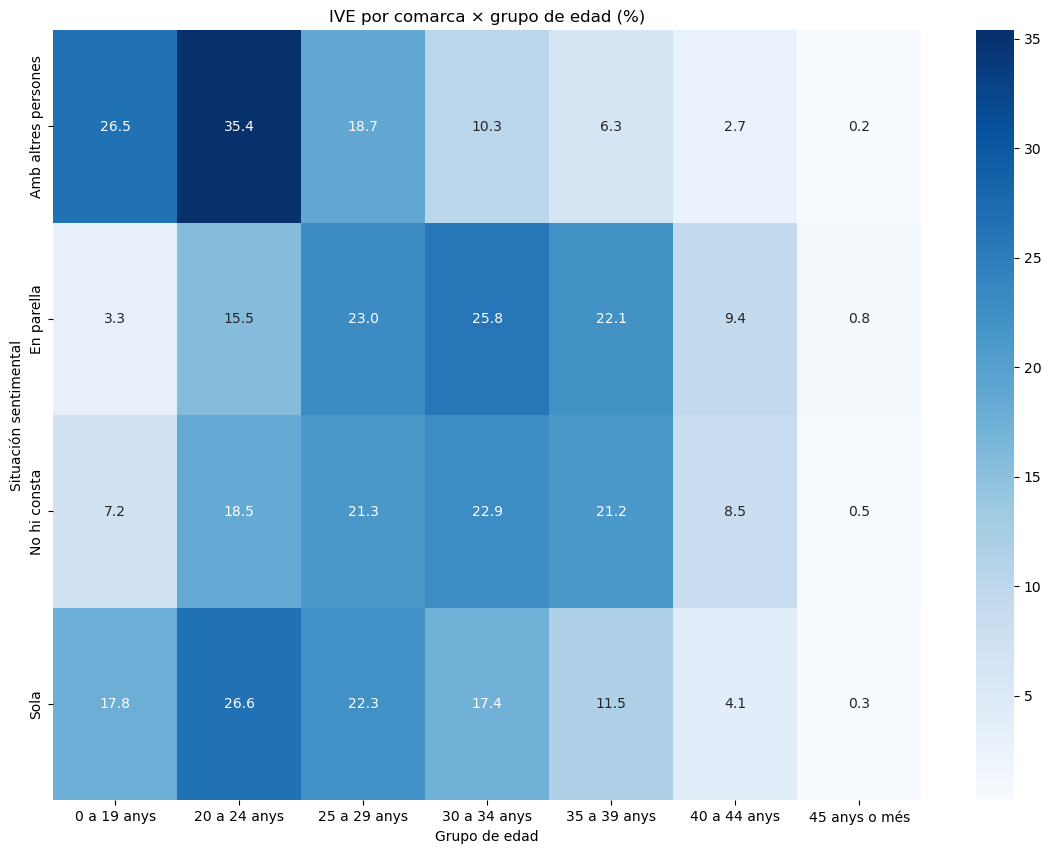

In [ ]:

tabla = df_ive_cat.pivot_table(
    index="situació de convivència",
    columns="grup d'edat",
    values="nombre de casos",
    aggfunc="sum",
    fill_value=0
)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100  # porcentajes por fila

plt.figure(figsize=(14,10))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("IVE por comarca × grupo de edad (%)")
plt.ylabel("Situación sentimental")
plt.xlabel("Grupo de edad")
plt.show()


## Pregunta 7: Cuantos hay de acuerdo a las comarca de residencia?

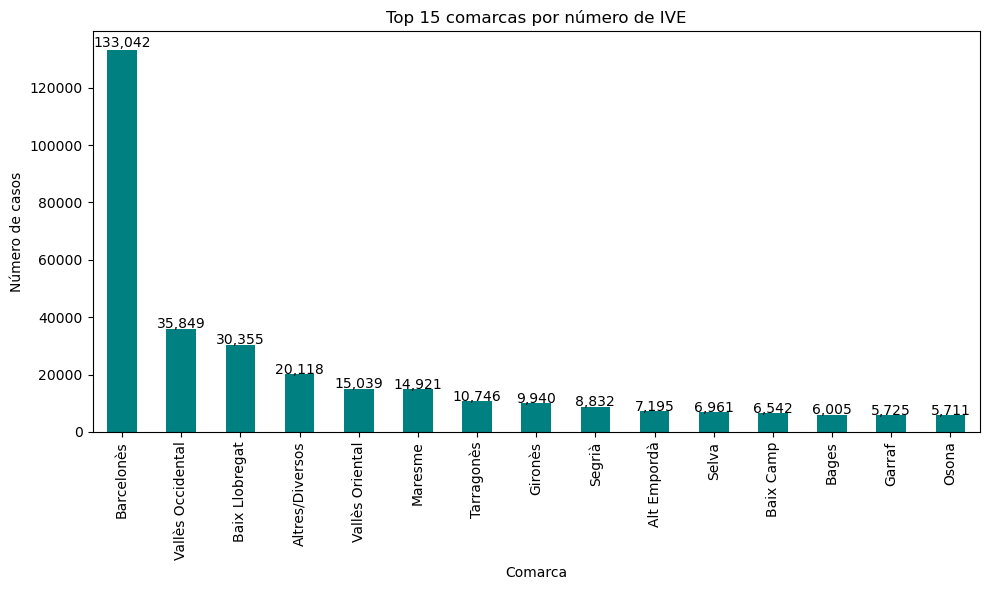

In [ ]:
com_counts = df_ive_cat.groupby("nom de la comarca de residència")['nombre de casos'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = com_counts.head(15).plot(kind='bar', color='teal')

plt.title("Top 15 comarcas por número de IVE")
plt.ylabel("Número de casos")
plt.xlabel("Comarca")

for i, v in enumerate(com_counts.head(15)):
    ax.text(i, v + v*0.01, f"{v:,}", ha='center')

plt.tight_layout()
plt.show()


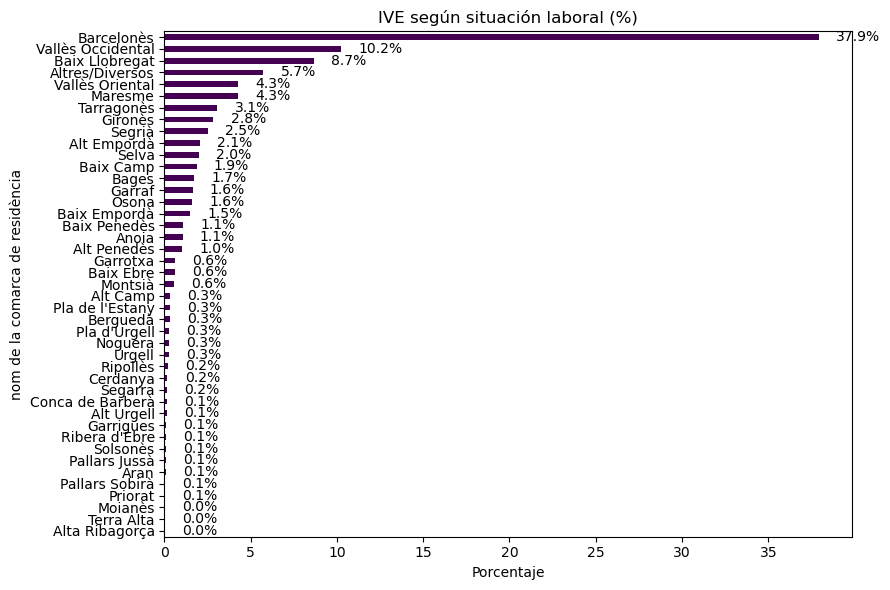

In [700]:
counts = df_ive_cat.groupby("nom de la comarca de residència")['nombre de casos'].sum()
pct = counts / counts.sum() * 100

plt.figure(figsize=(9,6))
ax = pct.sort_values().plot(kind='barh', cmap='viridis')

plt.title("IVE según situación laboral (%)")
plt.xlabel("Porcentaje")

for i, v in enumerate(pct.sort_values()):
    ax.text(v + 1, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.show()


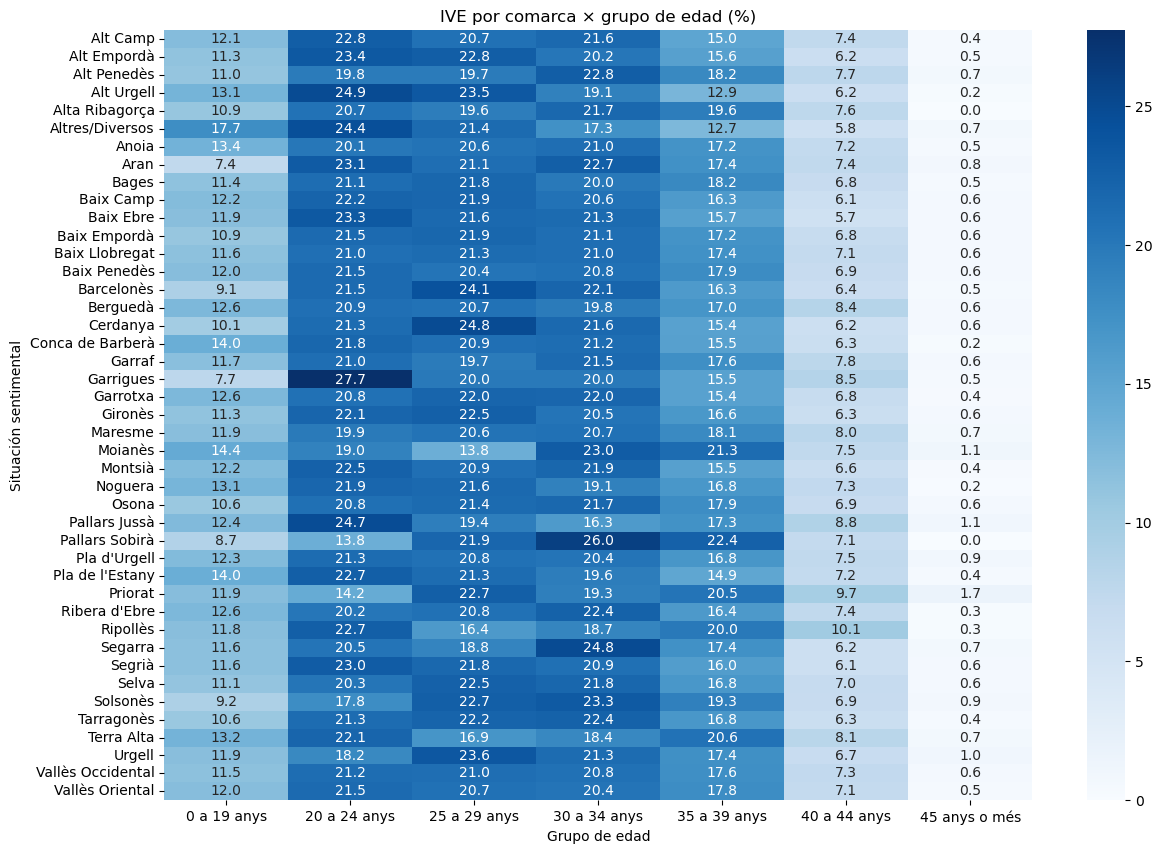

In [701]:

tabla = df_ive_cat.pivot_table(
    index="nom de la comarca de residència",
    columns="grup d'edat",
    values="nombre de casos",
    aggfunc="sum",
    fill_value=0
)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100  # porcentajes por fila

plt.figure(figsize=(14,10))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("IVE por comarca × grupo de edad (%)")
plt.ylabel("Situación sentimental")
plt.xlabel("Grupo de edad")
plt.show()

 
##  Pregunta 8: Cuantos abortos hubo por año y cual fueron los metodos utilizados? 

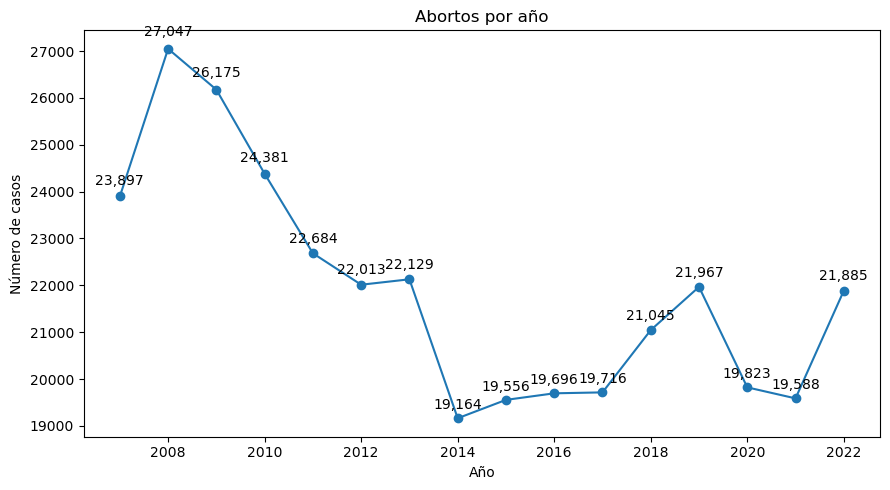

In [683]:
year_counts = df_ive_cat.groupby("any")['nombre de casos'].sum()

plt.figure(figsize=(9,5))
ax = year_counts.plot(marker="o")

plt.title("Abortos por año")
plt.xlabel("Año")
plt.ylabel("Número de casos")

for x, y in zip(year_counts.index, year_counts):
    ax.text(x, y + y*0.01, f"{y:,}", ha='center')

plt.tight_layout()
plt.show()


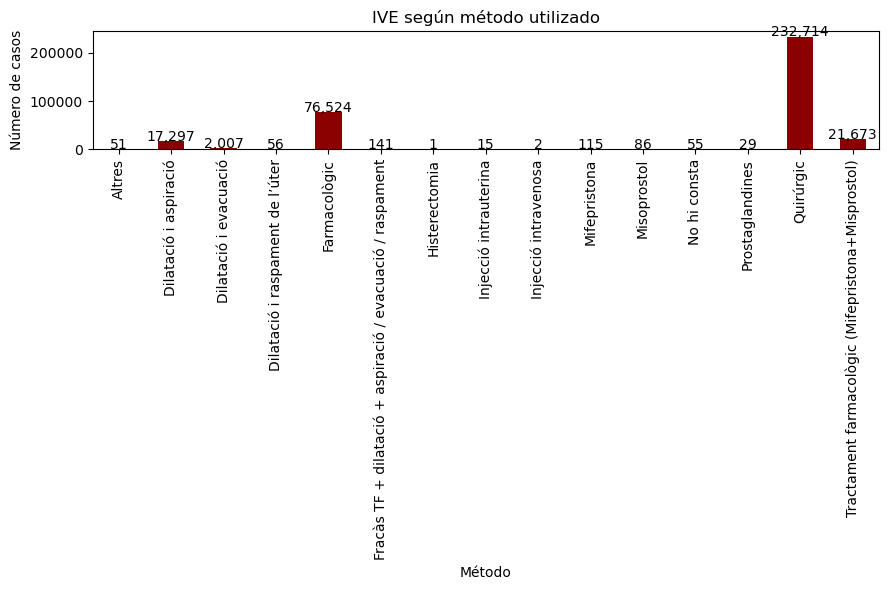

In [684]:
method_counts = df_ive_cat.groupby("mètode")['nombre de casos'].sum()

plt.figure(figsize=(9,6))
ax = method_counts.plot(kind='bar', color='darkred')

plt.title("IVE según método utilizado")
plt.xlabel("Método")
plt.ylabel("Número de casos")

for i, v in enumerate(method_counts):
    ax.text(i, v + v*0.01, f"{v:,}", ha='center')

plt.tight_layout()
plt.show()


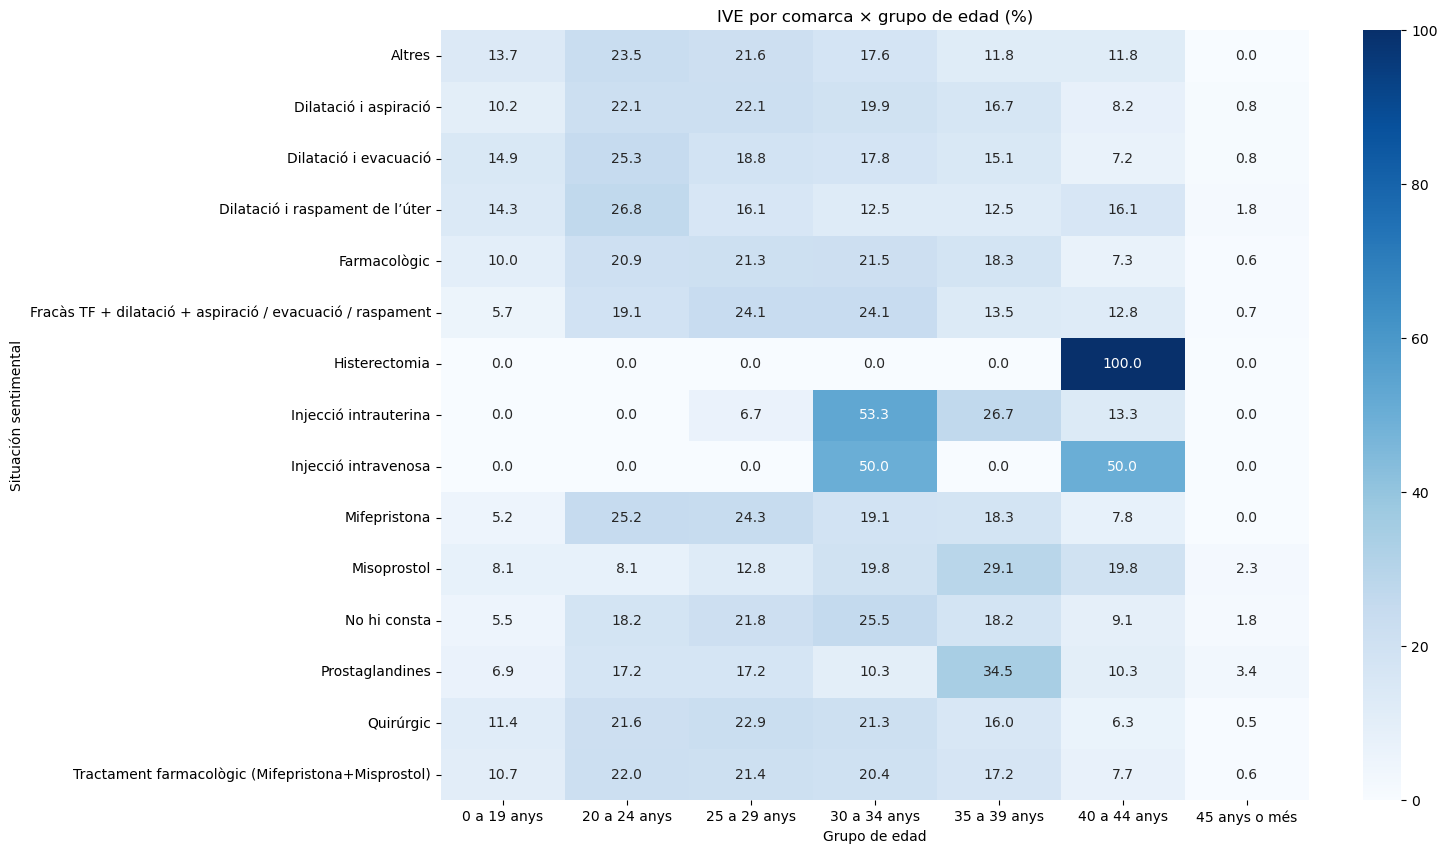

In [702]:
tabla = df_ive_cat.pivot_table(
    index="mètode",
    columns="grup d'edat",
    values="nombre de casos",
    aggfunc="sum",
    fill_value=0
)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100  # porcentajes por fila

plt.figure(figsize=(14,10))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("IVE por comarca × grupo de edad (%)")
plt.ylabel("Situación sentimental")
plt.xlabel("Grupo de edad")
plt.show()

In [698]:
metodos_year = df_ive_cat.pivot_table(
    index="any",
    columns="mètode",
    values="nombre de casos",
    aggfunc="sum",
    fill_value=0
)

metodos_year_pct = metodos_year.div(metodos_year.sum(axis=1), axis=0) * 100


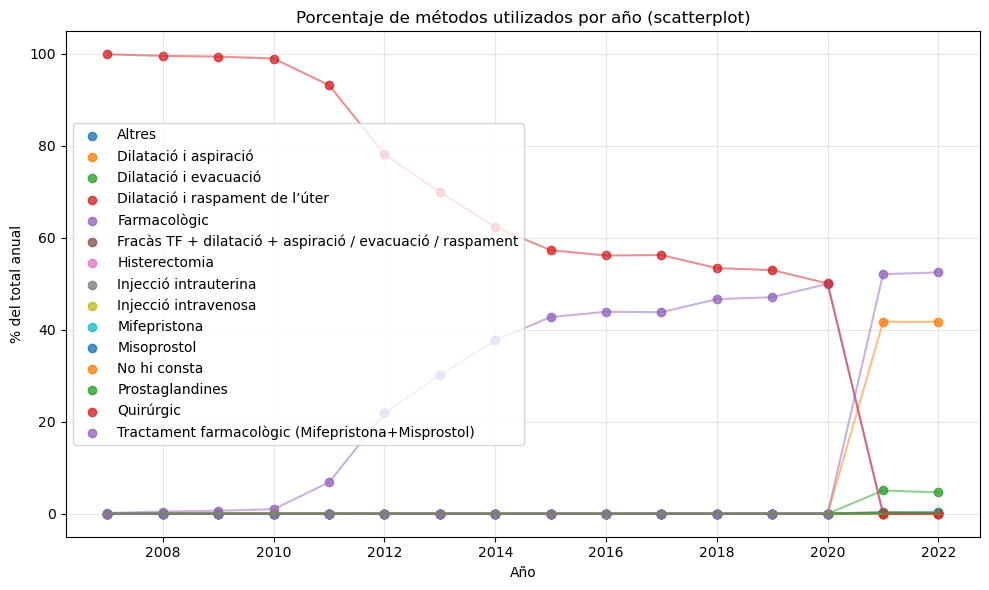

In [699]:
plt.figure(figsize=(10,6))

for metodo in metodos_year_pct.columns:
    plt.scatter(
        metodos_year_pct.index,
        metodos_year_pct[metodo],
        label=metodo,
        alpha=0.8
    )
    plt.plot(metodos_year_pct.index, metodos_year_pct[metodo], alpha=0.5)

plt.title("Porcentaje de métodos utilizados por año (scatterplot)")
plt.ylabel("% del total anual")
plt.xlabel("Año")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Dataset df_mujeres
## ❓ Pregunta 1: ¿Qué comunidades tienen más mujeres?



In [708]:
df_mujeres['Total'].unique()

array(['11.926.861', '2.290.661', '9.636.200', '4.815.743', '1.419.531',
       '3.396.213', '7.111.118', '871.130', '6.239.988', '3.202.818',
       '494.374', '2.708.444', '2.263.406', '420.460', '1.842.946',
       '939.412', '73.914', '865.498', '7.119.275', '1.351.038',
       '5.768.237', '1.261.533', '605.314', '656.219', '5.857.742',
       '745.724', '5.112.018', '1.604.768', '445.249', '1.159.519',
       '1.290.804', '393.757', '897.047', '313.964', '51.492', '262.472',
       '2.192.679', '407.955', '1.784.724', '854.280', '249.536',
       '604.744', '1.338.399', '158.419', '1.179.980', '569.718',
       '92.373', '477.345', '406.555', '74.981', '331.573', '163.164',
       '17.392', '145.772', '1.308.019', '218.932', '1.089.086',
       '191.535', '86.160', '105.374', '1.116.484', '132.772', '983.712',
       '314.942', '96.650', '218.292', '256.191', '88.395', '167.796',
       '58.751', '8.255', '50.496', '317.547', '52.638', '264.909',
       '124.774', '30.963', '93.8

In [719]:
df_mujeres["Total"] = pd.to_numeric(df_mujeres["Total"],errors = 'coerce')

In [723]:
df_mujeres["Total"].astype("int64")


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [722]:
df_mujeres["Total"] = (
    df_mujeres["Total"]
    .replace("-", np.nan)
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(int)
)


ValueError: invalid literal for int() with base 10: 'nan'

In [709]:
df_mujeres["Total"] = (
    df_mujeres["Total"]
    .astype(str)                    # Asegurarnos que sea string
    .str.replace(".", "", regex=False)  # Eliminar separador de miles
    .str.replace(",", ".", regex=False) # Reemplazar coma decimal por punto
    .astype(float)                  # Convertimos a float primero
    .astype(int)                    # Luego a int
)


ValueError: could not convert string to float: ''

In [706]:
# Agrupar por comunidad
com_counts = df_mujeres.groupby('Comunidades y Ciudades Autónomas')['Total'].sum()

# Convertir a porcentaje
com_pct = com_counts / com_counts.sum() * 100

plt.figure(figsize=(12,6))
ax = com_pct.sort_values().plot(kind='bar', cmap='viridis')

plt.title("Porcentaje de mujeres por Comunidad Autónoma")
plt.ylabel("Porcentaje")

# Añadir valores
for i, v in enumerate(com_pct.sort_values()):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'str'

## ❓ Pregunta 2: ¿Cómo se distribuyen las situaciones sentimentales?


In [ ]:
sent_counts = df_mujeres.groupby('Situación sentimental')['Total'].sum()
sent_pct = sent_counts / sent_counts.sum() * 100

plt.figure(figsize=(10,6))
ax = sent_pct.sort_values().plot(kind='bar', cmap='plasma')

plt.title("Distribución de situaciones sentimentales (%)")
plt.ylabel("Porcentaje")

for i, v in enumerate(sent_pct.sort_values()):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8,8))
plt.pie(sent_pct, labels=sent_pct.index, autopct='%1.1f%%', wedgeprops={'width':0.4})
plt.title("Situación sentimental — Donut (%)")
plt.show()


## ❓ Pregunta 3: ¿Qué porcentaje de mujeres tiene hijos y cuantos NO quieren tener ?(comparacion)


In [ ]:
hijos_counts = df_mujeres.groupby('Tiene hijos')['Total'].sum()
hijos_pct = hijos_counts / hijos_counts.sum() * 100

plt.figure(figsize=(8,6))
ax = hijos_pct.plot(kind='bar', color=['seagreen','tomato'])

plt.title("Porcentaje de mujeres que tienen hijos")
plt.ylabel("Porcentaje")

for i, v in enumerate(hijos_pct):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()


In [ ]:
no_quieren = df_mujeres[df_mujeres['Intención de tener hijos'] == "No quiere tener hijos"]['Total'].sum()
si_quieren = df_mujeres['Total'].sum() - no_quieren

values = [no_quieren, si_quieren]
labels = ["No quieren tener hijos", "Sí (otros escenarios)"]
pct = [v / sum(values) * 100 for v in values]

plt.figure(figsize=(7,6))
plt.bar(labels, pct, color=['tomato','skyblue'])

for i, v in enumerate(pct):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.title("Porcentaje de mujeres que NO quieren tener hijos")
plt.ylabel("Porcentaje")
plt.tight_layout()
plt.show()


## ❓ Pregunta 4: ¿Qué intención de tener hijos es más común?

In [ ]:
intent_counts = df_mujeres.groupby('Intención de tener hijos')['Total'].sum()
intent_pct = intent_counts / intent_counts.sum() * 100

plt.figure(figsize=(10,6))
ax = intent_pct.sort_values().plot(kind='bar', cmap='viridis')

plt.title("Intención de tener hijos (%)")
plt.ylabel("Porcentaje")

for i, v in enumerate(intent_pct.sort_values()):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8,8))
plt.pie(intent_pct, labels=intent_pct.index, autopct='%1.1f%%', cmap='viridis')
plt.title("Intención de tener hijos (%)")
plt.show()



## ❓ Pregunta 5: Relación entre situación sentimental y tener hijos

In [ ]:
tabla = df_mujeres.pivot_table(
    index='Situación sentimental',
    columns='Tiene hijos',
    values='Total',
    aggfunc='sum'
)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="viridis")

plt.title("Situación sentimental × Tener hijos (%)")
plt.xlabel("Tiene hijos")
plt.ylabel("Situación sentimental")
plt.show()


In [ ]:
tabla_pct.plot(kind='bar', figsize=(10,6), colormap='viridis')

plt.title("Relación entre situación sentimental y tener hijos (%)")
plt.ylabel("Porcentaje")
plt.xlabel("Situación sentimental")
plt.legend(title="Tiene hijos")

plt.tight_layout()
plt.show()



## Pregunta 6: Mujeres que quieren ser madres pero no tienen pareja sentimental?

In [ ]:
filtro = (
    (df_mujeres['Situación sentimental'] == 'Sin pareja') &
    (df_mujeres['Intención de tener hijos'] == 'Quiere tener hijos')
)

valor = df_mujeres[filtro]['Total'].sum()

plt.figure(figsize=(6,5))
plt.bar(['Quieren hijos sin pareja'], [valor], color='purple')

plt.text(0, valor + 1, f"{valor:,}", ha='center')

plt.title("Mujeres que quieren hijos pero no tienen pareja")
plt.ylabel("Número de mujeres")
plt.tight_layout()
plt.show()


In [ ]:
total = df_mujeres['Total'].sum()
pct = valor / total * 100

plt.figure(figsize=(6,5))
plt.bar(['% sobre total'], [pct], color='mediumorchid')

plt.text(0, pct + 0.5, f"{pct:.1f}%", ha='center')

plt.title("Porcentaje de mujeres que quieren hijos pero no tienen pareja")
plt.ylabel("%")
plt.tight_layout()
plt.show()



## Pregunta 8: Mujeres que tienen Hijos pero NO viven con sus parejas?

In [ ]:
filtro = (
    (df_mujeres['Tiene hijos'] == 'Sí') &
    (df_mujeres['Situación sentimental'].isin(['Soltera', 'Separada', 'Divorciada', 'Viuda']))
)

valor = df_mujeres[filtro]['Total'].sum()

plt.figure(figsize=(6,5))
plt.bar(['Con hijos sin pareja'], [valor], color='teal')

plt.text(0, valor + 1, f"{valor:,}", ha='center')

plt.title("Mujeres con hijos pero sin pareja")
plt.ylabel("Número de mujeres")
plt.tight_layout()
plt.show()


In [ ]:
pct = valor / df_mujeres[df_mujeres['Tiene hijos'] == 'Sí']['Total'].sum() * 100

plt.figure(figsize=(6,5))
plt.bar(['% del total con hijos'], [pct], color='darkcyan')

plt.text(0, pct + 0.5, f"{pct:.1f}%", ha='center')

plt.title("Porcentaje de mujeres con hijos que no tienen pareja")
plt.ylabel("%")
plt.tight_layout()
plt.show()



## Pregunta 9: Cuantas mujeres de las comunidades quieren ser madres? 

In [ ]:
filtro = df_mujeres['Intención de tener hijos'] == 'Quiere tener hijos'
com_quieren = df_mujeres[filtro].groupby('Comunidades y Ciudades Autónomas')['Total'].sum()

pct = com_quieren / com_quieren.sum() * 100

plt.figure(figsize=(12,6))
ax = pct.sort_values().plot(kind='bar', cmap='viridis')

plt.title("Porcentaje de mujeres que quieren ser madres por Comunidad")
plt.ylabel("Porcentaje")

for i, v in enumerate(pct.sort_values()):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()


In [ ]:
tabla = com_quieren.to_frame(name='Total')
tabla['Porcentaje'] = pct

plt.figure(figsize=(6,10))
sns.heatmap(tabla[['Porcentaje']], annot=True, fmt=".1f", cmap="viridis")

plt.title("Mujeres que quieren ser madres por Comunidad (%)")
plt.show()


ANALISIS: df_nacimientos_nacionalidad
## ❓ Pregunta 1: Nacimientos por nacionalidad cada año



## ❓ Pregunta 2: Evolución temporal total


## ❓ Pregunta 3: Orden de nacimiento por nacionalidad y cuales son españolas y/o extranjeras


## ❓ Pregunta 4: Variabilidad por nacionalidad


## ❓ Pregunta 5: Porcentaje por nacionalidad dentro del año

ANALISIS: df_fecundidad
## ❓ Pregunta 1: el promedio de fecundidad por comunidades autonomas 


## Pregunta 2: Cual es la edad promedio por nacionalidad en las comunidades autonomas 


## Pregunta 3: Por año cuantos hay en comunidades autonomas 

ANALISIS: df_nacimientos
## ❓ Pregunta 1: Por provincias cuantos por año? 
## ❓ Pregunta 2:Por edada cuantos abortos de acuerdo a la gestacion 
## ❓ Pregunta 3:relacion o comparacion por año y semana de gestacion con el dataset db_abortos( filtrando el año desde el 2009) ya que en el df_nacimientos solo hay desde el 2009- 2024
## ❓ Pregunta 4Cuantos nacimientos de la provincia de Catalunya hubo en los ultimos 5años y por grupo de edad

recuerda que el datasets tiene el valor de todas las semanas de gestacion por año y provincias se puede crear  una varieble alternativa de ello asi se trabaja con eso sin que haya duplicado. 
